<a href="https://colab.research.google.com/github/run-llama/llama_index/blob/main/docs/examples/multi_modal/gpt4v_multi_modal_retrieval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GPT4V understanding for PDF as image 

In [ ]:
!pip install llama-index  pyMuPDF tools frontend git+https://github.com/openai/CLIP.git

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import Patch
import io
from PIL import Image, ImageDraw
import numpy as np
import csv
import pandas as pd

from torchvision import transforms

from transformers import AutoModelForObjectDetection
import torch
import openai
import os
import fitz

device = "cuda" if torch.cuda.is_available() else "cpu"

OPENAI_API_TOKEN = "sk-"
openai.api_key = OPENAI_API_TOKEN

/Users/haotianzhang/llama_index/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# import pymupdf
# from fitz import convert_from_path
# Input PDF file name
pdf_file = "10-K.pdf"

# Split the base name and extension
output_directory_path, _ = os.path.splitext(pdf_file)

if not os.path.exists(output_directory_path):
    os.makedirs(output_directory_path)

# Open the PDF file
pdf_document = fitz.open(pdf_file)

# Iterate through each page and convert to an image
for page_number in range(pdf_document.page_count):
    # Get the page
    page = pdf_document[page_number]

    # Convert the page to an image
    pix = page.get_pixmap()

    # Create a Pillow Image object from the pixmap
    image = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)

    # Save the image
    image.save(f"./{output_directory_path}/page_{page_number + 1}.png")

# Close the PDF file
pdf_document.close()

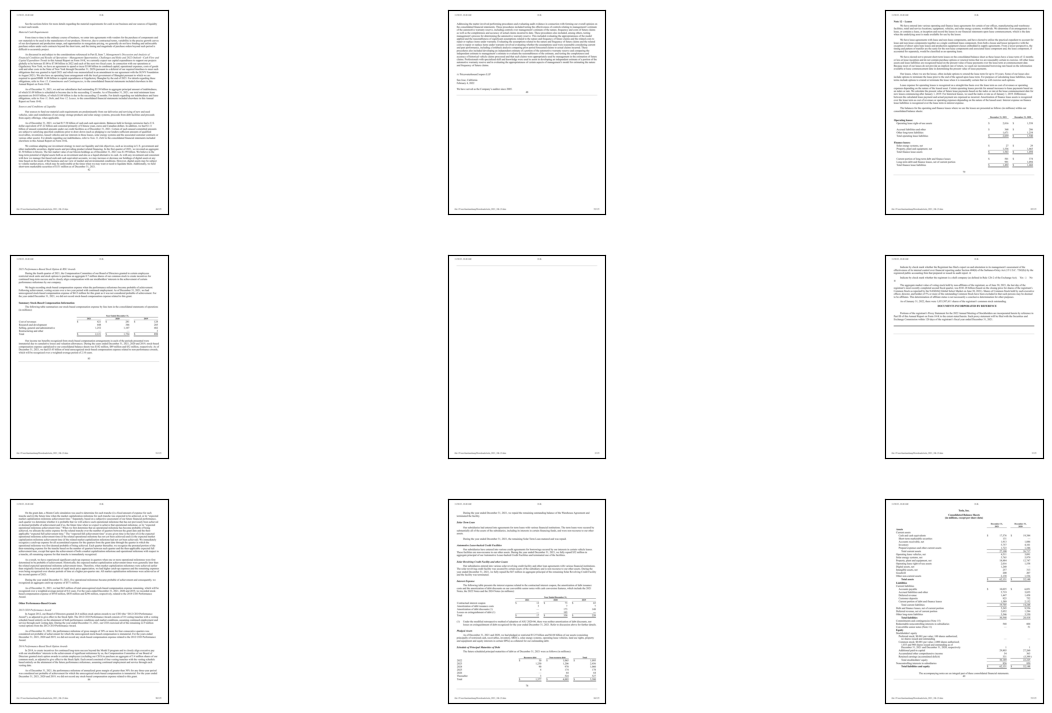

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import os

image_paths = []
for img_path in os.listdir("./10-K"):
    image_paths.append(str(os.path.join("./10-K", img_path)))


def plot_images(image_paths):
    images_shown = 0
    plt.figure(figsize=(16, 9))
    for img_path in image_paths:
        if os.path.isfile(img_path):
            image = Image.open(img_path)

            plt.subplot(3, 3, images_shown + 1)
            plt.imshow(image)
            plt.xticks([])
            plt.yticks([])

            images_shown += 1
            if images_shown >= 9:
                break


plot_images(image_paths)

In [ ]:
from llama_index.multi_modal_llms.openai import OpenAIMultiModal
from llama_index import SimpleDirectoryReader

# put your local directore here
image_documents = SimpleDirectoryReader("./10-K").load_data()

58 10-K/page_39.png


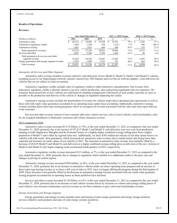

In [ ]:
plot_images([image_documents[58].image_path])

In [ ]:
openai_mm_llm = OpenAIMultiModal(
    model="gpt-4-vision-preview", api_key=OPENAI_API_TOKEN, max_new_tokens=1500
)

response = openai_mm_llm.complete(
    prompt="""
    Please load the table data and output in json format from the image
    """,
    image_documents=[image_documents[58]],
)

print(response)

To extract table data from an image and convert it to JSON format, I'll need to analyze the content of the image. Due to the nature of my text-based capabilities, I cannot literally "load" data as a traditional software application would. However, I can describe the structure and provide a JSON representation of the table with a high level of manual accuracy based on the excerpt presented within the image.

Please be aware that this process requires manual transcription and may be prone to human error. For a complete and accurate JSON representation, specialized OCR (Optical Character Recognition) tools and manual verification are recommended.

From the provided image, I can see that there's a table with financial results for certain periods, which appears to be an excerpt from a financial report. The table has columns corresponding to different periods such as "Year Ended December 31, 2021", "Year Ended December 31, 2020", etc., and multiple rows corresponding to different financial m